In [36]:
#pip install xgboost

In [6]:
#importing packages
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests                                      # reading data
from io import StringIO

from sklearn.datasets import fetch_openml            # common data set access
from sklearn.preprocessing import StandardScaler     # scaling transform
from sklearn.model_selection import train_test_split # validation tools
from sklearn.metrics import zero_one_loss as J01
from sklearn.preprocessing import OneHotEncoder
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import sklearn.tree as tree

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)  

In [2]:
pip install --upgrade imbalanced-learn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [61]:
Xtr = pd.read_csv("data/X_TRAINING_SET_Diabetes_ENCODED.csv")
Ytr = pd.read_csv("data/Y_TRAINING_SET.csv")
Xtr = Xtr.drop(columns=['Unnamed: 0','index','encounter_id','patient_nbr'])
                 
Xtest = pd.read_csv("data/X_VALIDATION_SET_ENCODED.csv")
Ytest = pd.read_csv("data/Y_VALIDATION_SET.csv")
Xtest = Xtest.drop(columns=['Unnamed: 0','index','encounter_id','patient_nbr'])



In [2]:
pip install -U imbalanced-learn

In [3]:
from imblearn.over_sampling import SMOTE

In [62]:
Ytr['readmitted'] = Ytr['readmitted'].map({'<30': 1, 'NO': 0, '>30': 2})
Ytest['readmitted'] = Ytest ['readmitted'].map({'<30': 1, 'NO': 0, '>30': 2})


In [63]:
Ytr=Ytr.iloc[:,1:]

In [64]:
new_column_names = [col.replace('[', '_').replace(']', '_').replace('<', 'less_than') for col in Xtr.columns]
# Create a dictionary to map old names to new names
column_mapping = dict(zip(Xtr.columns, new_column_names))
Xtr = Xtr.rename(columns=column_mapping)
#--------
new_column_names = [col.replace('[', '_').replace(']', '_').replace('<', 'less_than') for col in Xtest.columns]
# Create a dictionary to map old names to new names
column_mapping = dict(zip(Xtest.columns, new_column_names))
Xtest = Xtest.rename(columns=column_mapping)

In [68]:
Xtr

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,1.0,1.0,7.0,3.0,37.0,1.0,13.0,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,0,1
1,1.0,14.0,7.0,3.0,57.0,0.0,10.0,0.0,0.0,2.0,...,1,0,1,0,1,0,0,1,1,0
2,2.0,6.0,1.0,4.0,71.0,0.0,11.0,0.0,0.0,0.0,...,1,0,1,0,1,0,0,1,0,1
3,1.0,1.0,7.0,1.0,29.0,0.0,6.0,0.0,0.0,0.0,...,1,0,1,0,1,0,0,1,1,0
4,1.0,1.0,7.0,10.0,49.0,1.0,18.0,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,1.0,6.0,7.0,9.0,72.0,4.0,22.0,0.0,0.0,1.0,...,1,0,1,0,1,0,1,0,0,1
71232,5.0,1.0,1.0,3.0,1.0,3.0,9.0,1.0,0.0,0.0,...,1,0,1,0,1,0,0,1,0,1
71233,2.0,1.0,4.0,5.0,14.0,4.0,23.0,0.0,0.0,0.0,...,1,0,1,0,1,0,0,1,0,1
71234,1.0,1.0,7.0,3.0,45.0,6.0,13.0,0.0,0.0,0.0,...,1,0,1,0,1,0,0,1,1,0


In [25]:
sme = SMOTE(random_state=42)
Xtr, Ytr = sme.fit_resample(Xtr, Ytr)

In [28]:
Xtr.to_csv("data/XTR_SMOTE.csv")
Ytr.to_csv("data/YTR_SMOTE.csv")

In [69]:
from sklearn.ensemble import AdaBoostClassifier


cls = AdaBoostClassifier()

cls.fit(Xtr, Ytr)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


AdaBoostClassifier()

Top 25 Features:
discharge_dispositio: 0.3600
number_inpatient: 0.1400
admission_source_id: 0.0400
num_medications: 0.0400
number_emergency: 0.0400
admission_type_id: 0.0200
metformin_No: 0.0200
payer_code_BC: 0.0200
medical_specialty_Em: 0.0200
medical_specialty_He: 0.0200
medical_specialty_He: 0.0200
medical_specialty_Ob: 0.0200
age__50-60): 0.0200
medical_specialty_On: 0.0200
medical_specialty_Or: 0.0200
medical_specialty_Pe: 0.0200
age__90-100): 0.0200
diabetesMed_No: 0.0200
number_diagnoses: 0.0200
insulin_Steady: 0.0200
num_lab_procedures: 0.0200
time_in_hospital: 0.0200
num_procedures: 0.0200
number_outpatient: 0.0200
medical_specialty_Ga: 0.0000


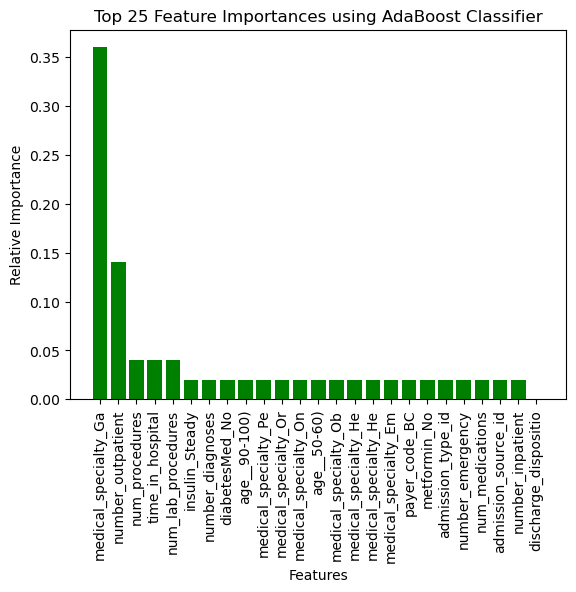

In [70]:
n = 25
features = Xtr.columns

n = min(n, len(features))
importances = cls.feature_importances_
indices = np.argsort(importances)[::-1] 
top_n_indices = indices[:n]
top_n_features = [feature[:20] for feature in features[top_n_indices]]
top_n_importances = importances[top_n_indices]

print(f'Top {n} Features:')
for feature, importance in zip(top_n_features, top_n_importances):
    print(f'{feature}: {importance:.4f}')

plt.title(f'Top {n} Feature Importances using AdaBoost Classifier')
plt.bar(range(len(top_n_indices)-1, -1, -1), top_n_importances[::-1], color='g', align='center')
plt.xticks(range(len(top_n_indices)), top_n_features[::-1], rotation='vertical')
plt.ylabel('Relative Importance')
plt.xlabel('Features')
plt.show()


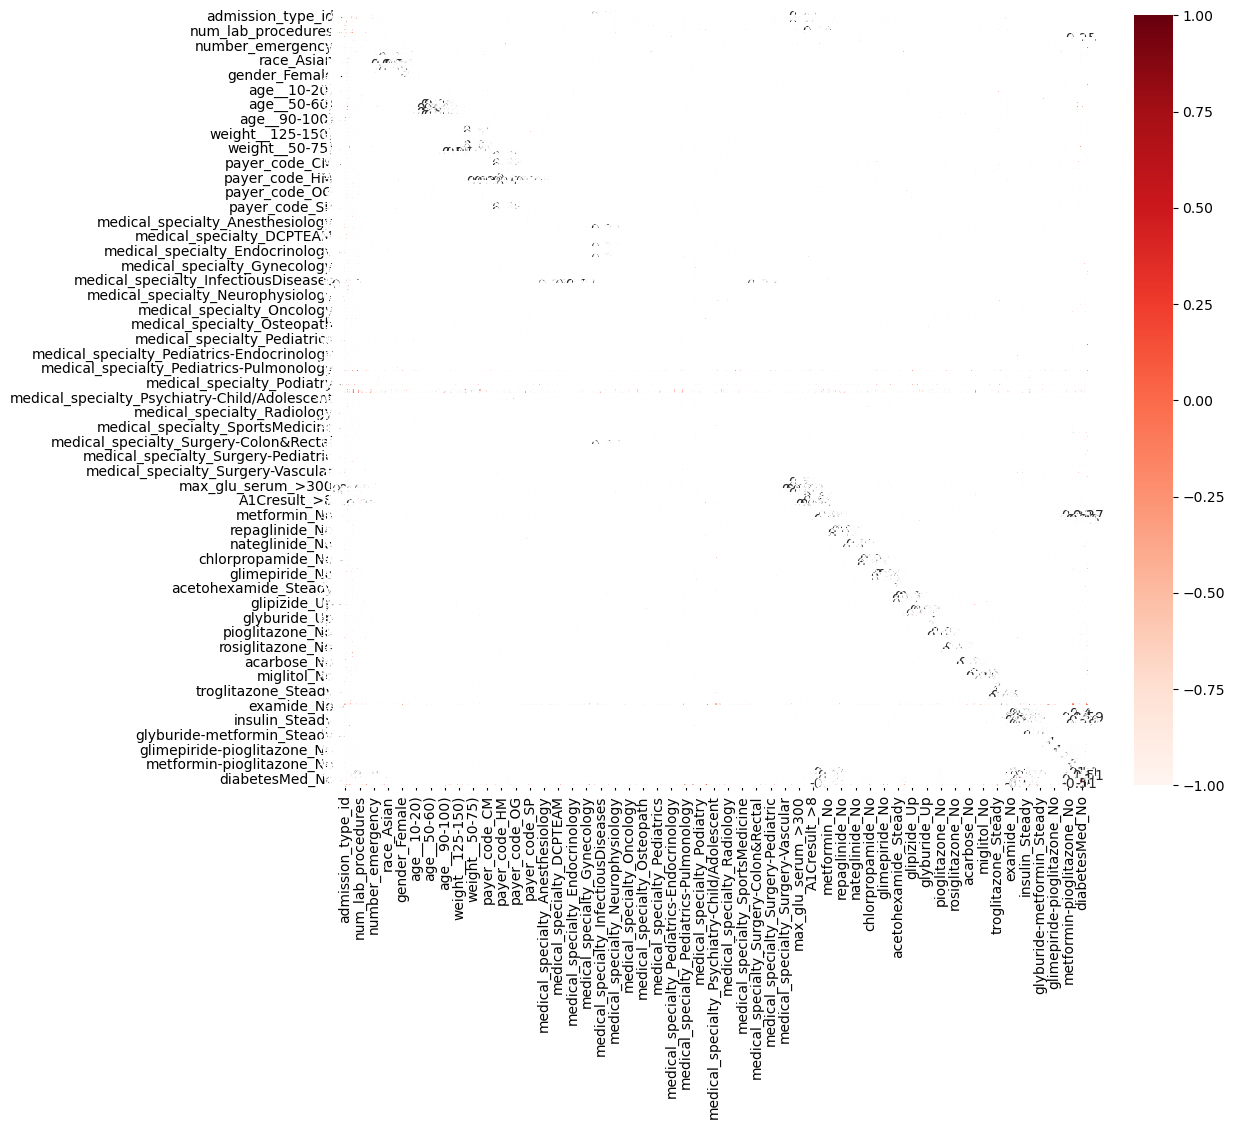

In [163]:
#trying a feature correlation 
plt.figure(figsize=(12,10))
cor = Xtr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [164]:

Xtr_top_n_adaboost = Xtr[top_n_features]

Xtr_top_n_adaboost

# Random Forest

In [30]:
cls=RandomForestClassifier()

In [32]:
cls.fit(Xtr, Ytr)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier()

Top 25 Features:
num_lab_procedures: 0.0854
num_medications: 0.0805
time_in_hospital: 0.0692
number_inpatient: 0.0627
number_diagnoses: 0.0510
num_procedures: 0.0503
discharge_dispositio: 0.0451
admission_type_id: 0.0332
number_outpatient: 0.0267
admission_source_id: 0.0253
number_emergency: 0.0224
gender_Female: 0.0180
gender_Male: 0.0168
medical_specialty_In: 0.0150
payer_code_MC: 0.0142
race_Caucasian: 0.0137
insulin_Steady: 0.0135
age__70-80): 0.0132
age__60-70): 0.0127
insulin_No: 0.0124
change_Ch: 0.0124
age__50-60): 0.0117
A1Cresult_None: 0.0116
diabetesMed_Yes: 0.0116
age__80-90): 0.0112


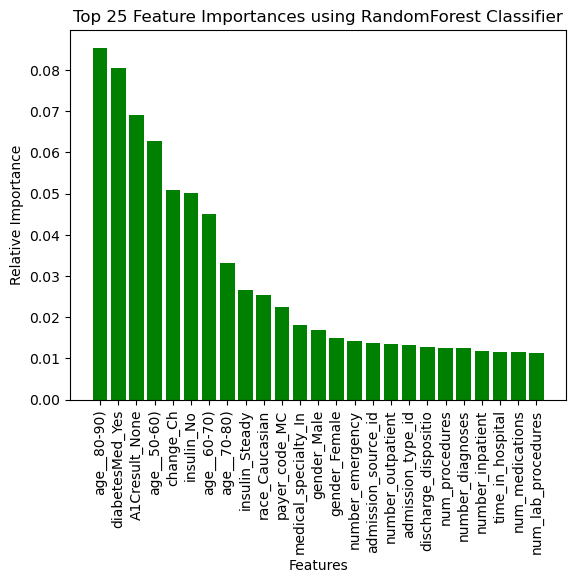

In [42]:
n = 25

importances = cls.feature_importances_
indices = np.argsort(importances)[::-1]  
features = Xtr.columns

n = min(n, len(features))
top_n_indices = indices[:n]
top_n_features = [feature[:20] for feature in features[top_n_indices]]
top_n_importances = importances[top_n_indices]

print(f'Top {n} Features:')
for feature, importance in zip(top_n_features, top_n_importances):
    print(f'{feature}: {importance:.4f}')

plt.title(f'Top {n} Feature Importances using RandomForest Classifier')
plt.bar(range(len(top_n_indices)-1, -1, -1), top_n_importances[::-1], color='g', align='center')
plt.xticks(range(len(top_n_indices)), top_n_features[::-1], rotation='vertical')
plt.ylabel('Relative Importance')
plt.xlabel('Features')
plt.show()


In [170]:
Xtr_top_n_rf = Xtr[top_n_features]


# XGBoost

In [46]:
new_column_names = [col.replace('[', '_').replace(']', '_').replace('<', 'less_than') for col in Xtr.columns]
column_mapping = dict(zip(Xtr.columns, new_column_names))
Xtr = Xtr.rename(columns=column_mapping)


Top 25 Features:
number_inpatient: 0.0658
discharge_dispositio: 0.0256
diabetesMed_No: 0.0141
admission_source_id: 0.0140
weight__75-100): 0.0126
number_emergency: 0.0125
medical_specialty_Ob: 0.0120
medical_specialty_Ph: 0.0115
number_diagnoses: 0.0113
age__90-100): 0.0109
number_outpatient: 0.0107
race_Asian: 0.0102
medical_specialty_Ne: 0.0100
age__70-80): 0.0098
payer_code_BC: 0.0094
medical_specialty_Or: 0.0092
payer_code_OG: 0.0091
max_glu_serum_None: 0.0090
medical_specialty_Em: 0.0090
race_Caucasian: 0.0089
weight__100-125): 0.0089
payer_code_SP: 0.0084
glyburide-metformin_: 0.0084
medical_specialty_Su: 0.0082
medical_specialty_Su: 0.0081


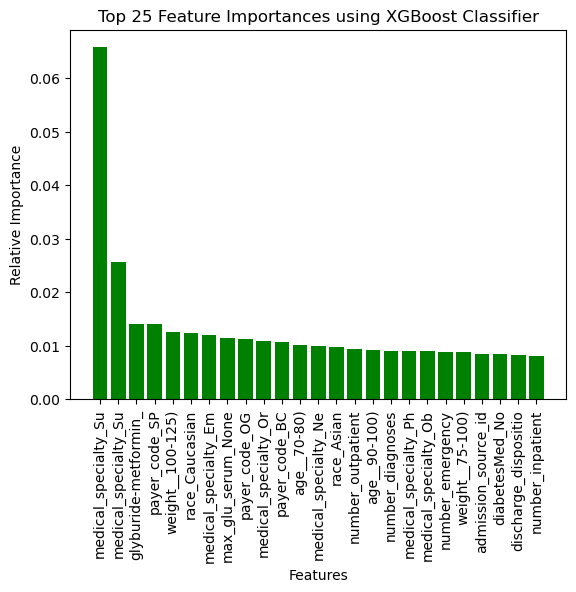

In [57]:

importances = cls.feature_importances_
indices = np.argsort(importances)[::-1]
features = Xtr.columns

n = 25  
top_n_indices = indices[:n]
top_n_features = [feature[:20] for feature in features[top_n_indices]] 
top_n_importances = importances[top_n_indices]

print(f'Top {n} Features:')
for feature, importance in zip(top_n_features, top_n_importances):
    print(f'{feature}: {importance:.4f}')

plt.title(f'Top {n} Feature Importances using XGBoost Classifier')
plt.bar(range(len(top_n_indices)-1, -1, -1), top_n_importances[::-1], color='g', align='center')
plt.xticks(range(len(top_n_indices)), top_n_features[::-1], rotation='vertical')
plt.ylabel('Relative Importance')
plt.xlabel('Features')
plt.show()


In [31]:
Xtr_top_n_xgb = Xtr[top_n_features]


In [32]:
Xtr_top_n_xgb.to_csv("data/Xtr_Feature_Selected_xgb.csv")

# Combination of Common Features

In [176]:

common_columns = list(set(Xtr_top_n_rf.columns) & set(Xtr_top_n_adaboost.columns) & set(Xtr_top_n_xgb.columns))

common_dataset = pd.concat([Xtr_top_n_rf[common_columns], Xtr_top_n_adaboost[common_columns], Xtr_top_n_xgb[common_columns]], axis=1)


In [178]:
common_dataset.to_csv('data/CommonBestFeatures.csv')

# Combination of All Features

In [179]:
combined_dataset = pd.concat([Xtr_top_n_rf, Xtr_top_n_adaboost, Xtr_top_n_xgb], axis=1)

combined_dataset = combined_dataset.loc[:,~combined_dataset.columns.duplicated()]


In [181]:
combined_dataset.to_csv('data/CombinedBestFeatures.csv')

# Experimentation on Neural Network

In [214]:
X_test = pd.read_csv('data/X_VALIDATION_SET_ENCODED.csv')
Y_tr = pd.read_csv('data/Y_TRAINING_SET_EDIT.csv')


In [228]:
y_test = pd.read_csv('data/Y_VALIDATION_SET_EDIT.csv')

In [215]:
X_test=X_test[X_tr.columns]

In [216]:
Y_tr=Y_tr.iloc[:,1:]

In [218]:
Y_tr = Y_tr.values.flatten()
Y_tr

array([0, 0, 0, ..., 0, 2, 2])

In [219]:
X_tr=common_dataset
X_tr

,number_diagnoses,number_outpatient,discharge_disposition_id,number_inpatient,admission_source_id,number_emergency,number_diagnoses,number_outpatient,discharge_disposition_id,number_inpatient,admission_source_id,number_emergency,number_diagnoses,number_outpatient,discharge_disposition_id,number_inpatient,admission_source_id,number_emergency
0,3.0,0.0,1.0,0.0,7.0,0.0,3.0,0.0,1.0,0.0,7.0,0.0,3.0,0.0,1.0,0.0,7.0,0.0
1,6.0,0.0,14.0,2.0,7.0,0.0,6.0,0.0,14.0,2.0,7.0,0.0,6.0,0.0,14.0,2.0,7.0,0.0
2,9.0,0.0,6.0,0.0,1.0,0.0,9.0,0.0,6.0,0.0,1.0,0.0,9.0,0.0,6.0,0.0,1.0,0.0
3,5.0,0.0,1.0,0.0,7.0,0.0,5.0,0.0,1.0,0.0,7.0,0.0,5.0,0.0,1.0,0.0,7.0,0.0
4,4.0,0.0,1.0,0.0,7.0,0.0,4.0,0.0,1.0,0.0,7.0,0.0,4.0,0.0,1.0,0.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,9.0,0.0,6.0,1.0,7.0,0.0,9.0,0.0,6.0,1.0,7.0,0.0,9.0,0.0,6.0,1.0,7.0,0.0
71232,5.0,1.0,1.0,0.0,1.0,0.0,5.0,1.0,1.0,0.0,1.0,0.0,5.0,1.0,1.0,0.0,1.0,0.0
71233,9.0,0.0,1.0,0.0,4.0,0.0,9.0,0.0,1.0,0.0,4.0,0.0,9.0,0.0,1.0,0.0,4.0,0.0
71234,6.0,0.0,1.0,0.0,7.0,0.0,6.0,0.0,1.0,0.0,7.0,0.0,6.0,0.0,1.0,0.0,7.0,0.0


In [247]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(128, input_dim=X_tr.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax')) 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_tr, Y_tr, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Epoch 1/10
2227/2227 [==============================] - 1s 432us/step - loss: 0.9256 - accuracy: 0.5665 - val_loss: 0.9059 - val_accuracy: 0.5775
Epoch 2/10
2227/2227 [==============================] - 1s 403us/step - loss: 0.9039 - accuracy: 0.5730 - val_loss: 0.9000 - val_accuracy: 0.5727
Epoch 3/10
2227/2227 [==============================] - 1s 397us/step - loss: 0.8989 - accuracy: 0.5750 - val_loss: 0.8952 - val_accuracy: 0.5773
Epoch 4/10
2227/2227 [==============================] - 1s 395us/step - loss: 0.8961 - accuracy: 0.5761 - val_loss: 0.8956 - val_accuracy: 0.5817
Epoch 5/10
2227/2227 [==============================] - 1s 391us/step - loss: 0.8948 - accuracy: 0.5772 - val_loss: 0.8926 - val_accuracy: 0.5777
Epoch 6/10
2227/2227 [==============================] - 1s 383us/step - loss: 0.8941 - accuracy: 0.5765 - val_loss: 0.8974 - val_accuracy: 0.5750
Epoch 7/10
2227/2227 [==============================] - 1s 385us/step - loss: 0.8926 - accuracy: 0.5779 - val_loss: 0.8943 -

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [229]:
y_test

,Unnamed: 0,readmitted
0,60056,0
1,66252,0
2,71804,1
3,16676,0
4,25765,0
...,...,...
10069,91655,0
10070,28636,2
10071,101193,0
10072,94482,0


In [230]:
y_test=y_test.iloc[:,1:]


In [232]:
y_test=y_test.values

In [235]:
y_test=y_test.flatten()

## PERFORMANCE OF MLP ON COMBINED FEATURE SET

In [253]:
X_tr=combined_dataset
X_test = pd.read_csv('data/X_VALIDATION_SET_ENCODED.csv')
X_test=X_test.iloc[:,1:]
X_test=X_test[X_tr.columns]
Y_tr = pd.read_csv('data/Y_TRAINING_SET_EDIT.csv')
y_test = pd.read_csv('data/Y_VALIDATION_SET_EDIT.csv')
Y_tr=Y_tr.iloc[:,1:]
Y_tr = Y_tr.values.flatten()
y_test=y_test.iloc[:,1:]
y_test=y_test.values
y_test=y_test.flatten()


KeyError: "['age__70-80)', 'age__60-70)', 'age__80-90)', 'age__50-60)', 'age__40-50)', 'age__90-100)', 'weight__75-100)', 'weight__100-125)'] not in index"